In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import json
import os
from typing import Any, List, Dict, Tuple
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
def read_json(
    filename: str = None, sort_key: Any = None, *args, **kwargs
) -> Dict[Any, Any]:
    """
    Reads JSON file. Returns None if path does not exist.

    Args:
        filename (str, optional): name of JSON file to read. Defaults to None.

    Returns:
        dictionary: returns read JSON data
    """
    with open(filename, *args, **kwargs,encoding='utf-8') as f:
        data = json.load(f) if os.path.exists(filename) else None
        if sort_key:
            return sorted(data, key=sort_key)
        else:
            return data


In [3]:
file_path = r"C:\Users\lguid\OneDrive\Documents\MA 490\cases2024.json"
data = read_json(r"cases2024.json")

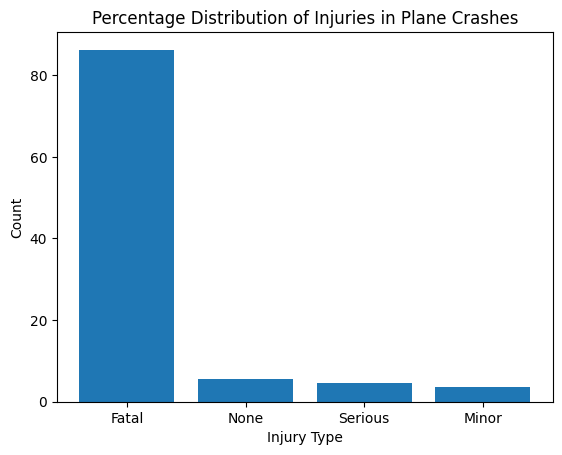

In [4]:
import pandas as pd
df = pd.DataFrame(data)


df = df.drop(columns=['prelimNarrative','cm_closed','cm_hasSafetyRec','cm_isStudy','cm_reportNum','cm_mode','airportId'])

# Visualize how 90% of SD crashes are fatal -- helps to show the importance 

df['CrashType'] = df['cm_completionStatus'].apply(lambda x: 'Fatal' if x == 'Fatal' else 'Non-Fatal')


injury_counts = df['cm_highestInjury'].value_counts()
injury_counts = (injury_counts/injury_counts.sum())*100

plt.bar(injury_counts.index, injury_counts)
plt.title('Percentage Distribution of Injuries in Plane Crashes')
plt.xlabel('Injury Type')
plt.ylabel('Count')
plt.show()

plt.show()

C:\Users\lguid\AppData\Local\Temp\ipykernel_27044\2829447512.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  us_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


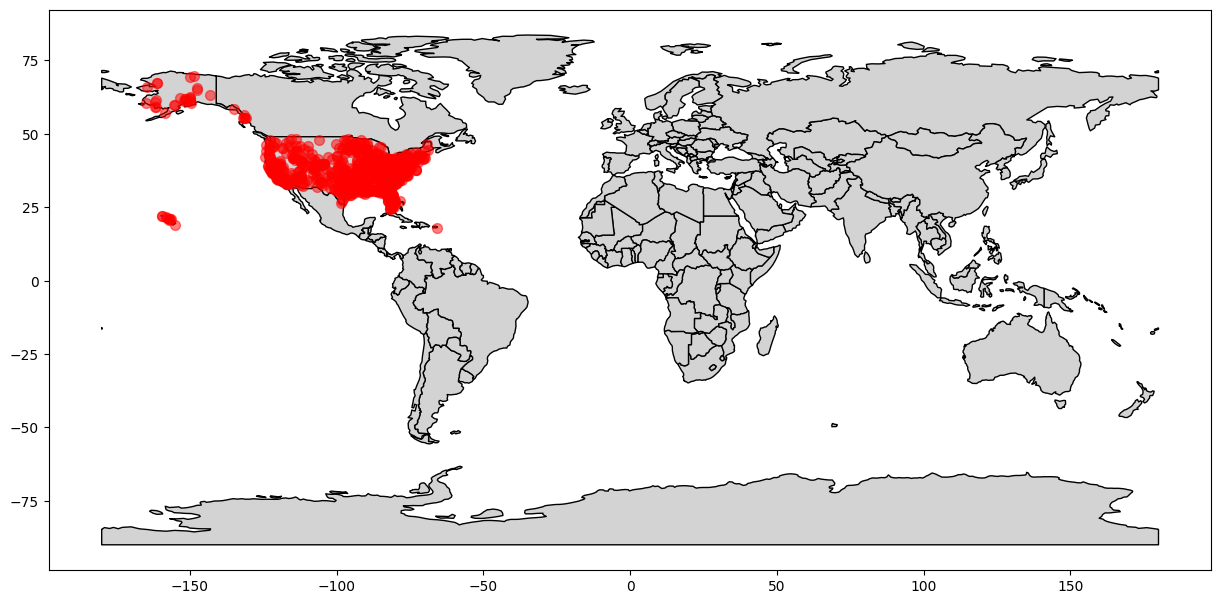

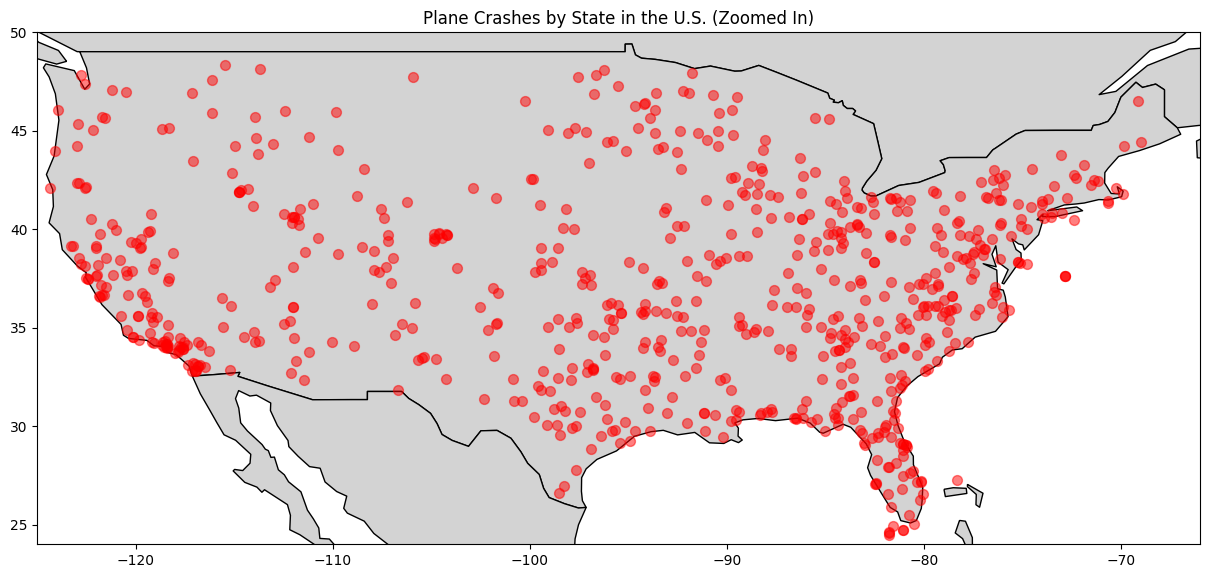

In [5]:
geometry = [Point(xy) for xy in zip(df['cm_Longitude'], df['cm_Latitude'])]
crashes_gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Load a U.S. map shapefile directly (assuming it's available in GeoPandas datasets)
us_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Group crashes by state
crashes_by_state = crashes_gdf.groupby('cm_state').size().reset_index(name='CrashCount')

# Merge the crash count with the U.S. map data
us_map_with_crashes = us_map.merge(crashes_by_state, left_on='name', right_on='cm_state', how='left')

# Plot the U.S. map with crash counts by state
fig, ax = plt.subplots(figsize=(15, 10))
us_map_with_crashes.plot(ax=ax, color='lightgrey', edgecolor='black')
crashes_gdf.plot(ax=ax, color='red', marker='o', markersize=50, alpha=0.5)

bbox = [-125, 24, -66, 50]

# Plot the U.S. map with crash counts by state and zoom in
fig, ax = plt.subplots(figsize=(15, 10))
us_map_with_crashes.plot(ax=ax, color='lightgrey', edgecolor='black')
crashes_gdf.plot(ax=ax, color='red', marker='o', markersize=50, alpha=0.5)

# Set the axis limits to zoom in on the specified bounding box
ax.set_xlim(bbox[0], bbox[2])
ax.set_ylim(bbox[1], bbox[3])

plt.title('Plane Crashes by State in the U.S. (Zoomed In)')
plt.show()


C:\Users\lguid\AppData\Local\Temp\ipykernel_27044\2667748712.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  us_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\lguid\AppData\Local\Temp\ipykernel_27044\2667748712.py:9: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  us_map[us_map['name'] == 'United States'].plot(ax=ax, color='lightgrey', edgecolor='black', aspect='equal')


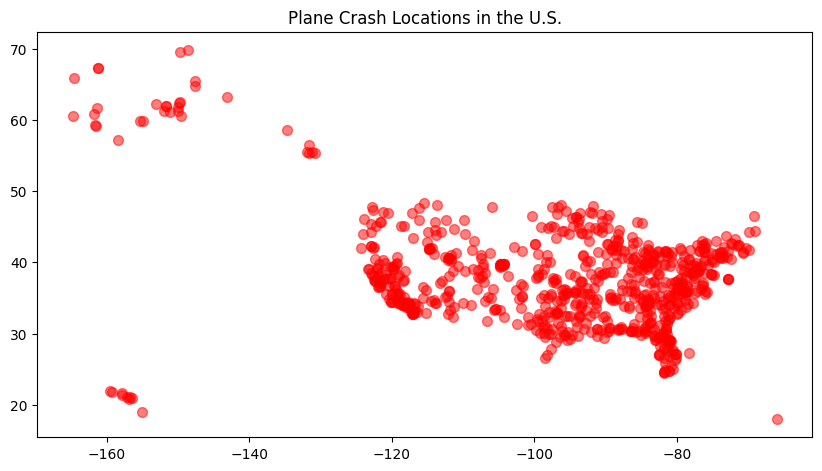

In [6]:
geometry = [Point(xy) for xy in zip(df['cm_Longitude'], df['cm_Latitude'])]
crashes_gdf = gpd.GeoDataFrame(df, geometry=geometry)


us_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the U.S. map with a fixed aspect ratio
fig, ax = plt.subplots(figsize=(10, 6))
us_map[us_map['name'] == 'United States'].plot(ax=ax, color='lightgrey', edgecolor='black', aspect='equal')

# Plot the crashes on the U.S. map
crashes_gdf.plot(ax=ax, color='red', marker='o', markersize=50, alpha=0.5)

plt.title('Plane Crash Locations in the U.S.')
plt.show()